In [1]:
# importing required libraries for EDA
# the main aim is to understand data in better way

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

%matplotlib inline

# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

## 1.0 Importing data set and gathering basic info about dataset

In [2]:
# importing dataset and displaying top 5 rows

dataset=pd.read_csv('Travel.csv')
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
# getting shape and size
# dataset has 4888 rows and 20 columns

dataset.shape

(4888, 20)

In [4]:
# getting feature datatypes

dataset.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

### Observation
1. There is total 4888 rows and 20 columns.
2. There is total 3 data types float64, int64 and object.

### 1.1 Seperating numerical and categorical data

### 1.1.1 Numerical dataset

In [5]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O' and feature not in ['CustomerID']]

data_numerical=dataset[numerical_features]
data_numerical.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


###  1.1.1.1 Discrete Numerical features

In [6]:
discrete_features=[feature for feature in numerical_features if len(data_numerical[feature].unique())<25 ]
print(discrete_features)

['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


###  1.1.1.2 Continuous Numerical features

In [7]:
continuous_features=[feature for feature in numerical_features if len(data_numerical[feature].unique())>25 ]
continuous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

### 1.1.2 Categorical dataset

In [8]:
# 1. Getting categorical features from dataset 
# 2. Creating categorical dataframe

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O' and feature not in ['CustomerID']]

data_categorical=dataset[categorical_features]
data_categorical.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [9]:
# Getting unique categories for each features in categorical features

for feature in categorical_features:
    print("The feature is '{}' and number of categories are '{}'".format(feature, len(dataset[feature].unique())))

The feature is 'TypeofContact' and number of categories are '3'
The feature is 'Occupation' and number of categories are '4'
The feature is 'Gender' and number of categories are '3'
The feature is 'ProductPitched' and number of categories are '5'
The feature is 'MaritalStatus' and number of categories are '4'
The feature is 'Designation' and number of categories are '5'


### 1.3 Misssing values

In [10]:
# getting features with missing values

feature_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 ]
print(feature_nan)

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']


In [11]:
# getting count of missing values for individual features

for feature in feature_nan:
    print("{} has {} no. of missing values".format(feature, dataset[feature].isnull().sum()))

Age has 226 no. of missing values
TypeofContact has 25 no. of missing values
DurationOfPitch has 251 no. of missing values
NumberOfFollowups has 45 no. of missing values
PreferredPropertyStar has 26 no. of missing values
NumberOfTrips has 140 no. of missing values
NumberOfChildrenVisiting has 66 no. of missing values
MonthlyIncome has 233 no. of missing values


In [12]:
# Getting percentage of missing values for individual features

for feature in feature_nan:
    print("{} has {} % of missing values".format(feature, np.round((dataset[feature].isnull().mean())*100,3)))

Age has 4.624 % of missing values
TypeofContact has 0.511 % of missing values
DurationOfPitch has 5.135 % of missing values
NumberOfFollowups has 0.921 % of missing values
PreferredPropertyStar has 0.532 % of missing values
NumberOfTrips has 2.864 % of missing values
NumberOfChildrenVisiting has 1.35 % of missing values
MonthlyIncome has 4.767 % of missing values


## 2.0 Statistical analysis

### 2.1 Numerical dataset

### 2.1.1 Mean, Median and Mode for numerical dataset

In [13]:
# mean of individual features
data_numerical.mean()

ProdTaken                       0.188216
Age                            37.622265
CityTier                        1.654255
DurationOfPitch                15.490835
NumberOfPersonVisiting          2.905074
NumberOfFollowups               3.708445
PreferredPropertyStar           3.581037
NumberOfTrips                   3.236521
Passport                        0.290917
PitchSatisfactionScore          3.078151
OwnCar                          0.620295
NumberOfChildrenVisiting        1.187267
MonthlyIncome               23619.853491
dtype: float64

In [14]:
# median of individual features

data_numerical.median()

ProdTaken                       0.0
Age                            36.0
CityTier                        1.0
DurationOfPitch                13.0
NumberOfPersonVisiting          3.0
NumberOfFollowups               4.0
PreferredPropertyStar           3.0
NumberOfTrips                   3.0
Passport                        0.0
PitchSatisfactionScore          3.0
OwnCar                          1.0
NumberOfChildrenVisiting        1.0
MonthlyIncome               22347.0
dtype: float64

In [15]:
# mode of individual features
data_numerical.mode().loc[0]


ProdTaken                       0.0
Age                            35.0
CityTier                        1.0
DurationOfPitch                 9.0
NumberOfPersonVisiting          3.0
NumberOfFollowups               4.0
PreferredPropertyStar           3.0
NumberOfTrips                   2.0
Passport                        0.0
PitchSatisfactionScore          3.0
OwnCar                          1.0
NumberOfChildrenVisiting        1.0
MonthlyIncome               17342.0
Name: 0, dtype: float64

In [16]:
# verifying modes
for feature in data_numerical.columns:
    print(feature,":",stat.mode(data_numerical[feature]))

ProdTaken : 0
Age : 35.0
CityTier : 1
DurationOfPitch : 9.0
NumberOfPersonVisiting : 3
NumberOfFollowups : 4.0
PreferredPropertyStar : 3.0
NumberOfTrips : 2.0
Passport : 0
PitchSatisfactionScore : 3
OwnCar : 1
NumberOfChildrenVisiting : 1.0
MonthlyIncome : 17342.0


### 2.1.2 Varience and Standard deviation for numerical dataset 

In [17]:
# varience for individual features

round(data_numerical.var(),2)

ProdTaken                          0.15
Age                               86.80
CityTier                           0.84
DurationOfPitch                   72.58
NumberOfPersonVisiting             0.53
NumberOfFollowups                  1.01
PreferredPropertyStar              0.64
NumberOfTrips                      3.42
Passport                           0.21
PitchSatisfactionScore             1.87
OwnCar                             0.24
NumberOfChildrenVisiting           0.74
MonthlyIncome               28951914.85
dtype: float64

In [18]:
# Standard deviation for individual features

data_numerical.std()

ProdTaken                      0.390925
Age                            9.316387
CityTier                       0.916583
DurationOfPitch                8.519643
NumberOfPersonVisiting         0.724891
NumberOfFollowups              1.002509
PreferredPropertyStar          0.798009
NumberOfTrips                  1.849019
Passport                       0.454232
PitchSatisfactionScore         1.365792
OwnCar                         0.485363
NumberOfChildrenVisiting       0.857861
MonthlyIncome               5380.698361
dtype: float64

### 2.1.3 Covarience for numerical dataset

In [19]:
data_numerical.cov()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,0.152822,-0.535959,0.031120,0.260897,0.002728,0.043969,0.031050,0.013743,0.046318,0.027440,-0.002184,0.002494,-2.760977e+02
Age,-0.535959,86.795067,-0.134168,-0.944440,0.078126,-0.024058,-0.077447,3.158372,0.141269,0.235235,0.220050,0.058470,2.336518e+04
CityTier,0.031120,-0.134168,0.840125,0.176544,-0.001110,0.021716,-0.006707,-0.050474,0.000747,-0.052778,0.001698,0.000529,2.559460e+02
DurationOfPitch,0.260897,-0.944440,0.176544,72.584310,0.401434,0.080699,-0.045149,0.154174,0.128118,-0.033569,-0.006731,0.229346,-2.891828e+02
NumberOfPersonVisiting,0.002728,0.078126,-0.001110,0.401434,0.525466,0.238479,0.019575,0.261809,0.003680,-0.019386,0.003646,0.380176,7.565188e+02
NumberOfFollowups,0.043969,-0.024058,0.021716,0.080699,0.238479,1.005024,-0.019309,0.259783,0.002265,0.005550,0.005894,0.246696,9.580277e+02
PreferredPropertyStar,0.031050,-0.077447,-0.006707,-0.045149,0.019575,-0.019309,0.636818,0.017840,0.000377,-0.024736,0.006102,0.024441,5.884892e+01
NumberOfTrips,0.013743,3.158372,-0.050474,0.154174,0.261809,0.259783,0.017840,3.418872,0.010882,-0.011035,-0.010622,0.267269,1.265226e+03
Passport,0.046318,0.141269,0.000747,0.128118,0.003680,0.002265,0.000377,0.010882,0.206326,0.001815,-0.004923,0.007898,6.230027e+00
PitchSatisfactionScore,0.027440,0.235235,-0.052778,-0.033569,-0.019386,0.005550,-0.024736,-0.011035,0.001815,1.865387,0.045641,0.001029,2.236679e+02


### 2.1.4 Correlation for numerical dataset

In [20]:
# 1. Pearson correlation coefficient
data_numerical.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


In [21]:
# 2. Spearman's rank correlation coefficient
data_numerical.corr(method='spearman')

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.157085,0.087801,0.086776,0.007136,0.105114,0.096501,-0.000328,0.260844,0.049444,-0.011508,0.006563,-0.149986
Age,-0.157085,1.000000,-0.014803,-0.035876,0.018696,-0.006172,-0.014809,0.200520,0.033219,0.017679,0.052286,0.013769,0.456889
CityTier,0.087801,-0.014803,1.000000,0.024606,-0.004782,0.018374,-0.004007,-0.028983,0.001196,-0.041182,0.004572,0.003177,0.103717
DurationOfPitch,0.086776,-0.035876,0.024606,1.000000,0.081159,0.017313,0.000061,0.032146,0.045833,0.007630,-0.000409,0.045394,0.022753
NumberOfPersonVisiting,0.007136,0.018696,-0.004782,0.081159,1.000000,0.370903,0.033650,0.237788,0.010920,-0.021861,0.010991,0.597810,0.274362
NumberOfFollowups,0.105114,-0.006172,0.018374,0.017313,0.370903,1.000000,-0.017862,0.188606,0.006162,-0.001911,0.012583,0.324658,0.244884
PreferredPropertyStar,0.096501,-0.014809,-0.004007,0.000061,0.033650,-0.017862,1.000000,0.002749,-0.004264,-0.016924,0.016483,0.034648,0.007141
NumberOfTrips,-0.000328,0.200520,-0.028983,0.032146,0.237788,0.188606,0.002749,1.000000,0.020167,-0.011115,-0.022524,0.207279,0.206339
Passport,0.260844,0.033219,0.001196,0.045833,0.010920,0.006162,-0.004264,0.020167,1.000000,0.003303,-0.022330,0.018288,-0.004310
PitchSatisfactionScore,0.049444,0.017679,-0.041182,0.007630,-0.021861,-0.001911,-0.016924,-0.011115,0.003303,1.000000,0.069805,0.001793,0.022837


In [22]:
# 3. kendall rank correlation coefficient
data_numerical.corr(method='kendall')

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.130228,0.086299,0.072584,0.006757,0.097027,0.092405,-0.000290,0.260844,0.044453,-0.011508,0.006109,-0.122492
Age,-0.130228,1.000000,-0.012029,-0.024618,0.014799,-0.004605,-0.011748,0.146331,0.027540,0.013292,0.043347,0.010690,0.322336
CityTier,0.086299,-0.012029,1.000000,0.020313,-0.004441,0.016660,-0.003815,-0.025193,0.001175,-0.036372,0.004494,0.002901,0.082964
DurationOfPitch,0.072584,-0.024618,0.020313,1.000000,0.064281,0.013267,0.000116,0.023961,0.038337,0.005697,-0.000342,0.035443,0.015894
NumberOfPersonVisiting,0.006757,0.014799,-0.004441,0.064281,1.000000,0.323408,0.030515,0.199949,0.010341,-0.018634,0.010408,0.542139,0.212158
NumberOfFollowups,0.097027,-0.004605,0.016660,0.013267,0.323408,1.000000,-0.015816,0.154850,0.005688,-0.001480,0.011615,0.279578,0.183582
PreferredPropertyStar,0.092405,-0.011748,-0.003815,0.000116,0.030515,-0.015816,1.000000,0.002277,-0.004083,-0.014748,0.015783,0.030889,0.005534
NumberOfTrips,-0.000290,0.146331,-0.025193,0.023961,0.199949,0.154850,0.002277,1.000000,0.017878,-0.008853,-0.019968,0.171473,0.151431
Passport,0.260844,0.027540,0.001175,0.038337,0.010341,0.005688,-0.004083,0.017878,1.000000,0.002970,-0.022330,0.017024,-0.003520
PitchSatisfactionScore,0.044453,0.013292,-0.036372,0.005697,-0.018634,-0.001480,-0.014748,-0.008853,0.002970,1.000000,0.062758,0.001502,0.016788


### 2.1.5 five point summary for outliers

In [23]:
for feature in data_numerical.columns:
    print("Five Point Summary for {}".format(feature))
    print("1. Minimum value is: {}".format(data_numerical[feature].min()))  
    print("2. 1st quartile is: {}".format(np.percentile(data_numerical[feature], 25))) 
    print("3. Median is: {}".format(np.percentile(data_numerical[feature], 50))) 
    print("4. 3rd quartile is: {}".format(np.percentile(data_numerical[feature], 75))) 
    print("5. Maximum value is: {}".format(data_numerical[feature].max())) 
    print(" ")

Five Point Summary for ProdTaken
1. Minimum value is: 0
2. 1st quartile is: 0.0
3. Median is: 0.0
4. 3rd quartile is: 0.0
5. Maximum value is: 1
 
Five Point Summary for Age
1. Minimum value is: 18.0
2. 1st quartile is: nan
3. Median is: nan
4. 3rd quartile is: nan
5. Maximum value is: 61.0
 
Five Point Summary for CityTier
1. Minimum value is: 1
2. 1st quartile is: 1.0
3. Median is: 1.0
4. 3rd quartile is: 3.0
5. Maximum value is: 3
 
Five Point Summary for DurationOfPitch
1. Minimum value is: 5.0
2. 1st quartile is: nan
3. Median is: nan
4. 3rd quartile is: nan
5. Maximum value is: 127.0
 
Five Point Summary for NumberOfPersonVisiting
1. Minimum value is: 1
2. 1st quartile is: 2.0
3. Median is: 3.0
4. 3rd quartile is: 3.0
5. Maximum value is: 5
 
Five Point Summary for NumberOfFollowups
1. Minimum value is: 1.0
2. 1st quartile is: nan
3. Median is: nan
4. 3rd quartile is: nan
5. Maximum value is: 6.0
 
Five Point Summary for PreferredPropertyStar
1. Minimum value is: 3.0
2. 1st quart

### 2.2 Categorical dataset

### 2.2.1 Mode for categorical dataset

In [24]:
data_categorical.mode()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Male,Basic,Married,Executive


## 3.0 Graphical Analysis

### 3.1 Getting outliers

### 3.1.1 Outliers for Continuous features

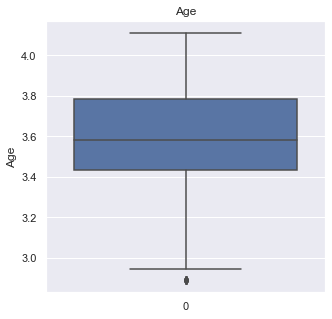

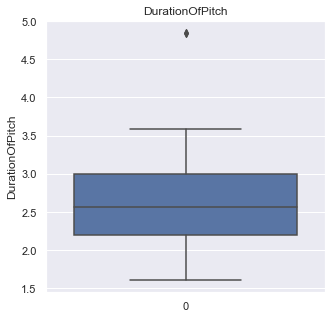

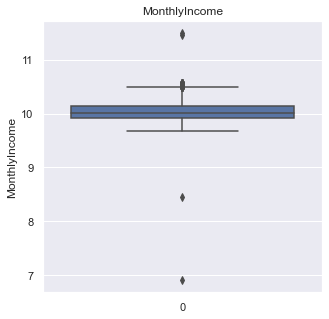

In [45]:
# box plot for checking outliers
sns.set(rc={'figure.figsize':(5,5)})
for feature in continuous_features:
    data1 = dataset.copy()
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in data1[feature].unique(): 
        pass
    else:
        data1[feature]=np.log(data1[feature])
        #data1.boxplot(column=feature)
        sns.boxplot(data=data1[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

### Observations 
1. All continuous feature contains outliers, so median will be used to replace missing values

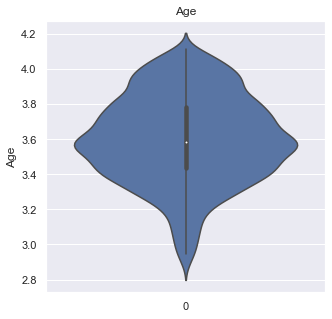

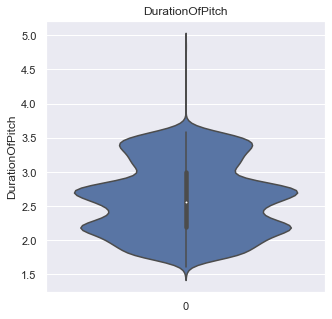

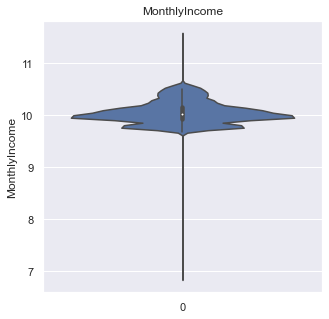

In [46]:
# violin plot for checking outliers
for feature in continuous_features:
    data1 = dataset.copy()
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in data1[feature].unique(): 
        pass
    else:
        data1[feature]=np.log(data1[feature])
        sns.violinplot(data=data1[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

### Observation 
1. Since there is outliers in features, hence missing value repalcement should be with median

### 3.1.2 Outliers for Discrete features

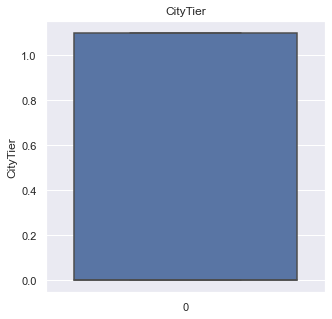

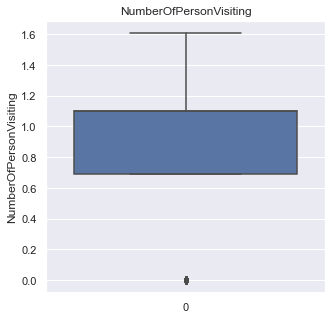

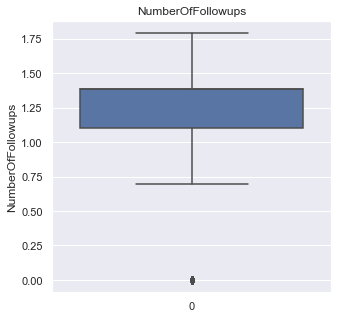

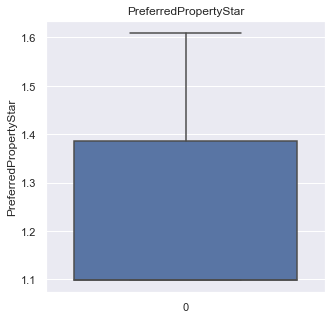

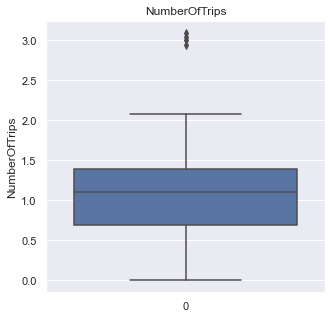

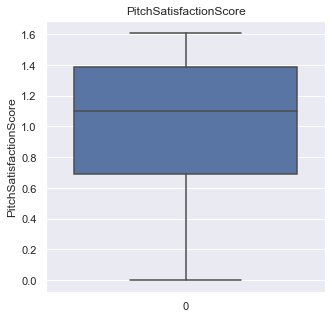

In [44]:
# box plot for checking outliers
for feature in discrete_features:
    data2 = dataset.copy()
    if 0 in data2[feature].unique(): #since log(0) is undefined
        pass
    else:
        data2[feature]=np.log(data2[feature])
        #data2.boxplot(column=feature)
        sns.boxplot(data=data2[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

### Observations
1. CityTier, PreferredPropertyStar, PitchSatisfactionScore has no outliers. 
2. NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips has outliers.

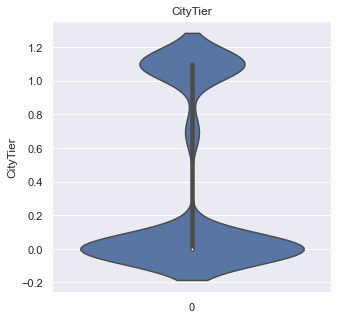

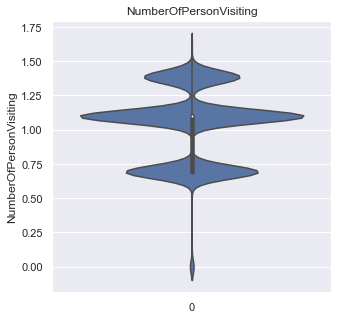

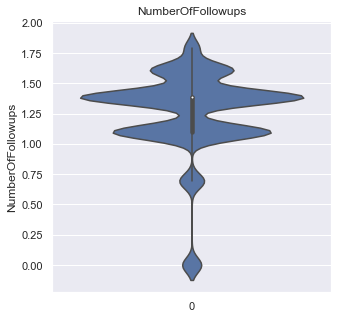

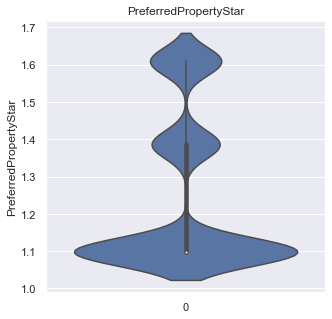

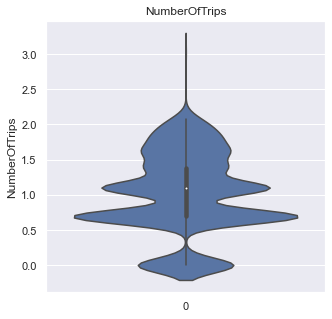

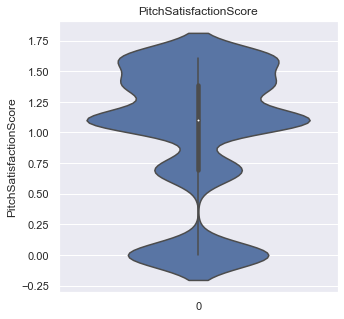

In [48]:
for feature in discrete_features:
    data2 = dataset.copy()
    if 0 in data2[feature].unique(): #since log(0) is undefined
        pass
    else:
        data2[feature]=np.log(data2[feature])
        sns.violinplot(data=data2[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

### Observation 
1. Since there is outliers in features, hence missing value repalcement should be with median

### 3.2 Missing Values

1. Since lot of feature have missing values we neeed to find relationship betwwen features having missing value and ProdTaken 

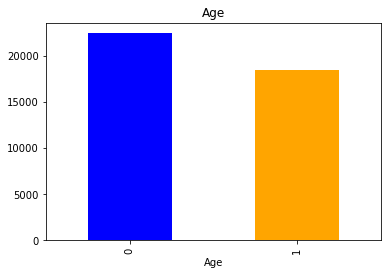

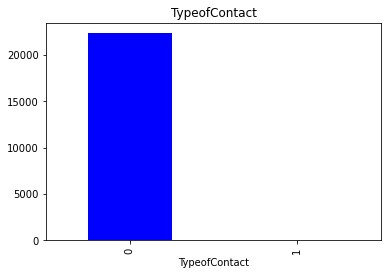

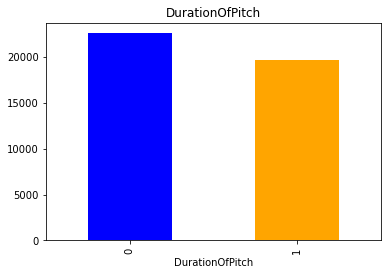

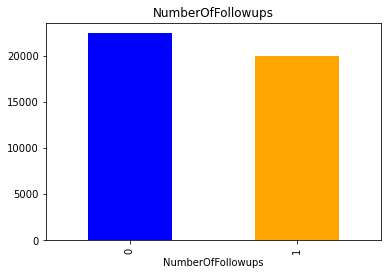

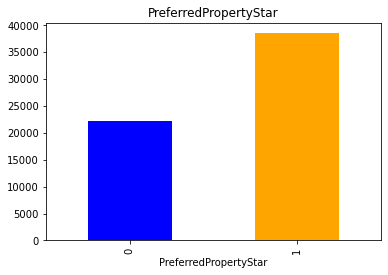

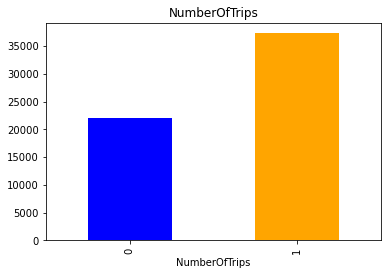

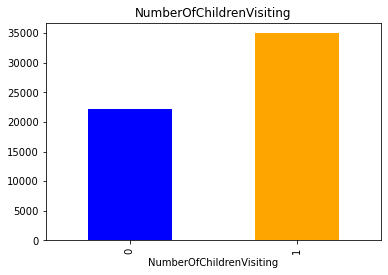

In [28]:
for feature in [feature for feature in feature_nan if feature not in ['MonthlyIncome']]: # excluding MonthlyIncome Column
    data3=dataset.copy()  # creating copy of data for further analysis
    
    # Making a variable that indicates 1 if the observation was missing or zero otherwise
    data3[feature] = np.where(data3[feature].isnull(),1,0)
    
    # Calculating median MonthlyIncome where the information is missing or present
    data3.groupby(feature)['MonthlyIncome'].median().plot.bar(color=['blue', 'orange'])
    plt.title(feature)
    plt.show();     

### 3.3 Comparing Numerical features with MonthlyIncome one by one

### 3.3.1 Comparing Discrete features with MonthlyIncome one by one

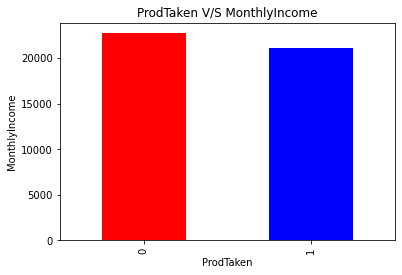

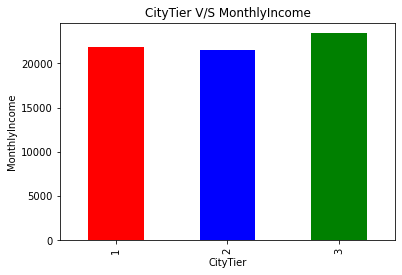

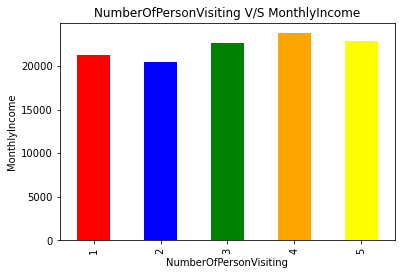

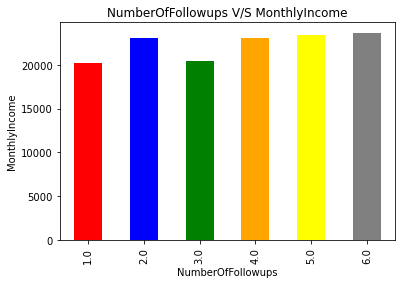

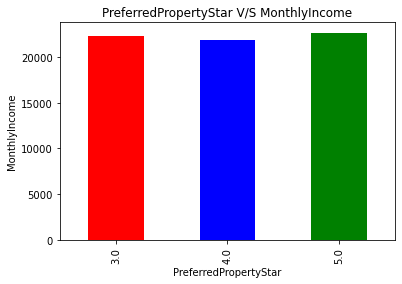

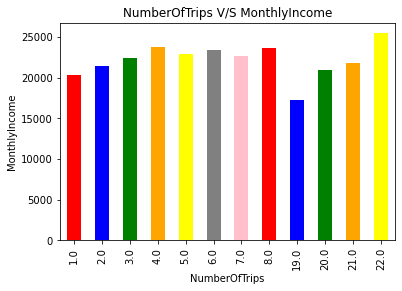

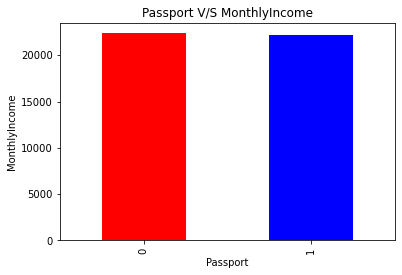

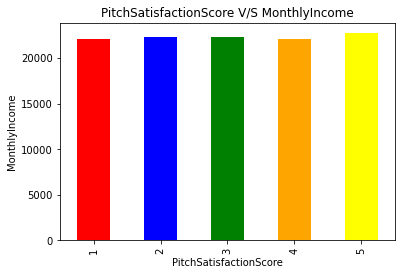

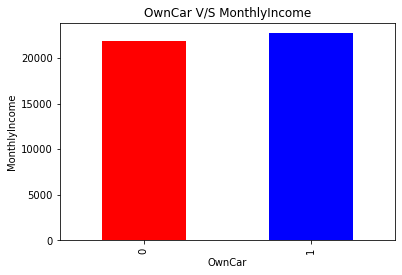

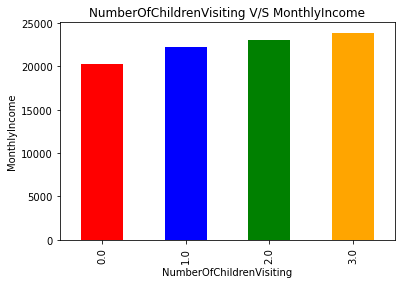

In [29]:
for feature in discrete_features:
    data4=dataset.copy()
    
    data4.groupby(feature)['MonthlyIncome'].median().plot.bar(color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
    plt.xlabel(feature)
    plt.ylabel('MonthlyIncome')
    plt.title('{} V/S MonthlyIncome'.format(feature))
    plt.show();

### Observation
1. From above plots it is visible that there is data imbalance.

### 3.3.2 Comparing Continuous features with MonthlyIncome one by one

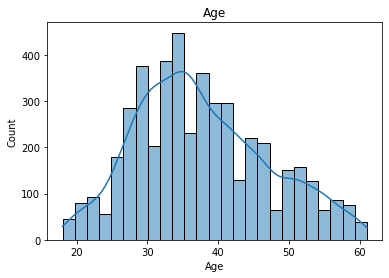

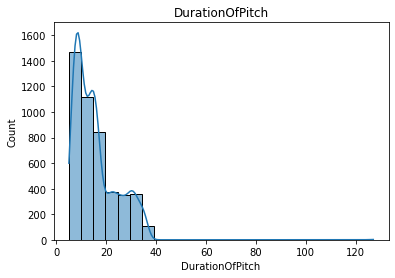

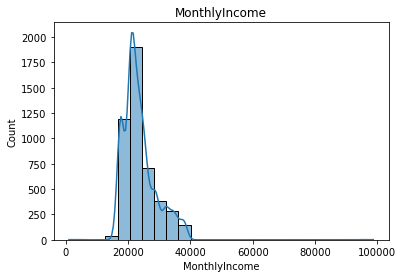

In [30]:
for feature in continuous_features:
    data5=dataset.copy()
    
    sns.histplot(data=data5[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();

### Observations 
1. All above plots for continuous variables are skewed, i.e. Non-Gaussian Distributions.
2. So log nornal transform will be used to convert it into gaussian distribution

### 3.4 Comparing Categorical features with MonthlyIncome one by one

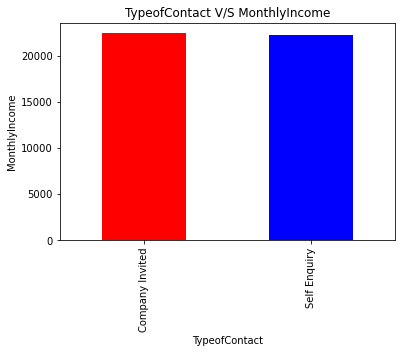

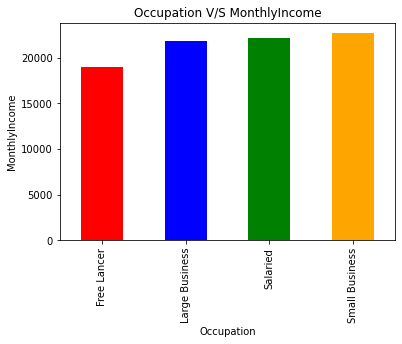

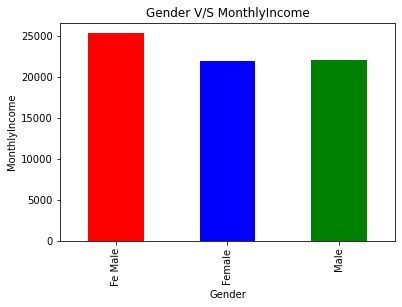

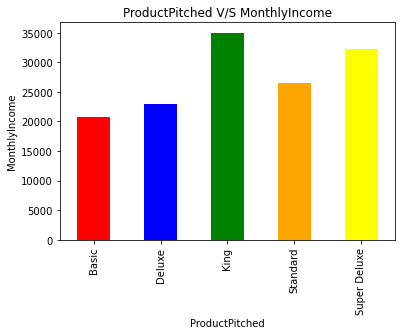

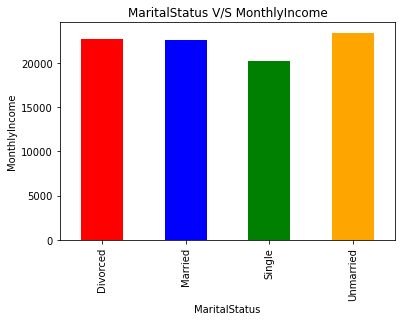

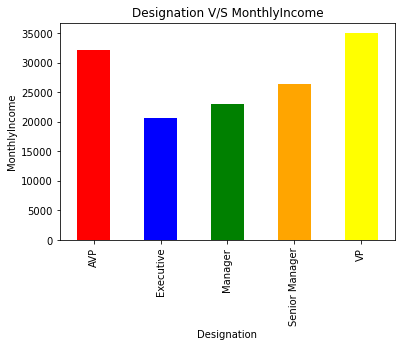

In [31]:
for feature in categorical_features:
    data6=dataset.copy()
    # here using median since data has outliers
    data6.groupby(feature)['MonthlyIncome'].median().plot.bar(color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
    plt.xlabel(feature)
    plt.ylabel('MonthlyIncome')
    plt.title("{} V/S MonthlyIncome".format(feature))
    plt.show()

### Observation
1. From above plots it is visible that there is data imbalance.

### 3.5 Relationship between any two features

### 3.5.1 Discrete Numerical features

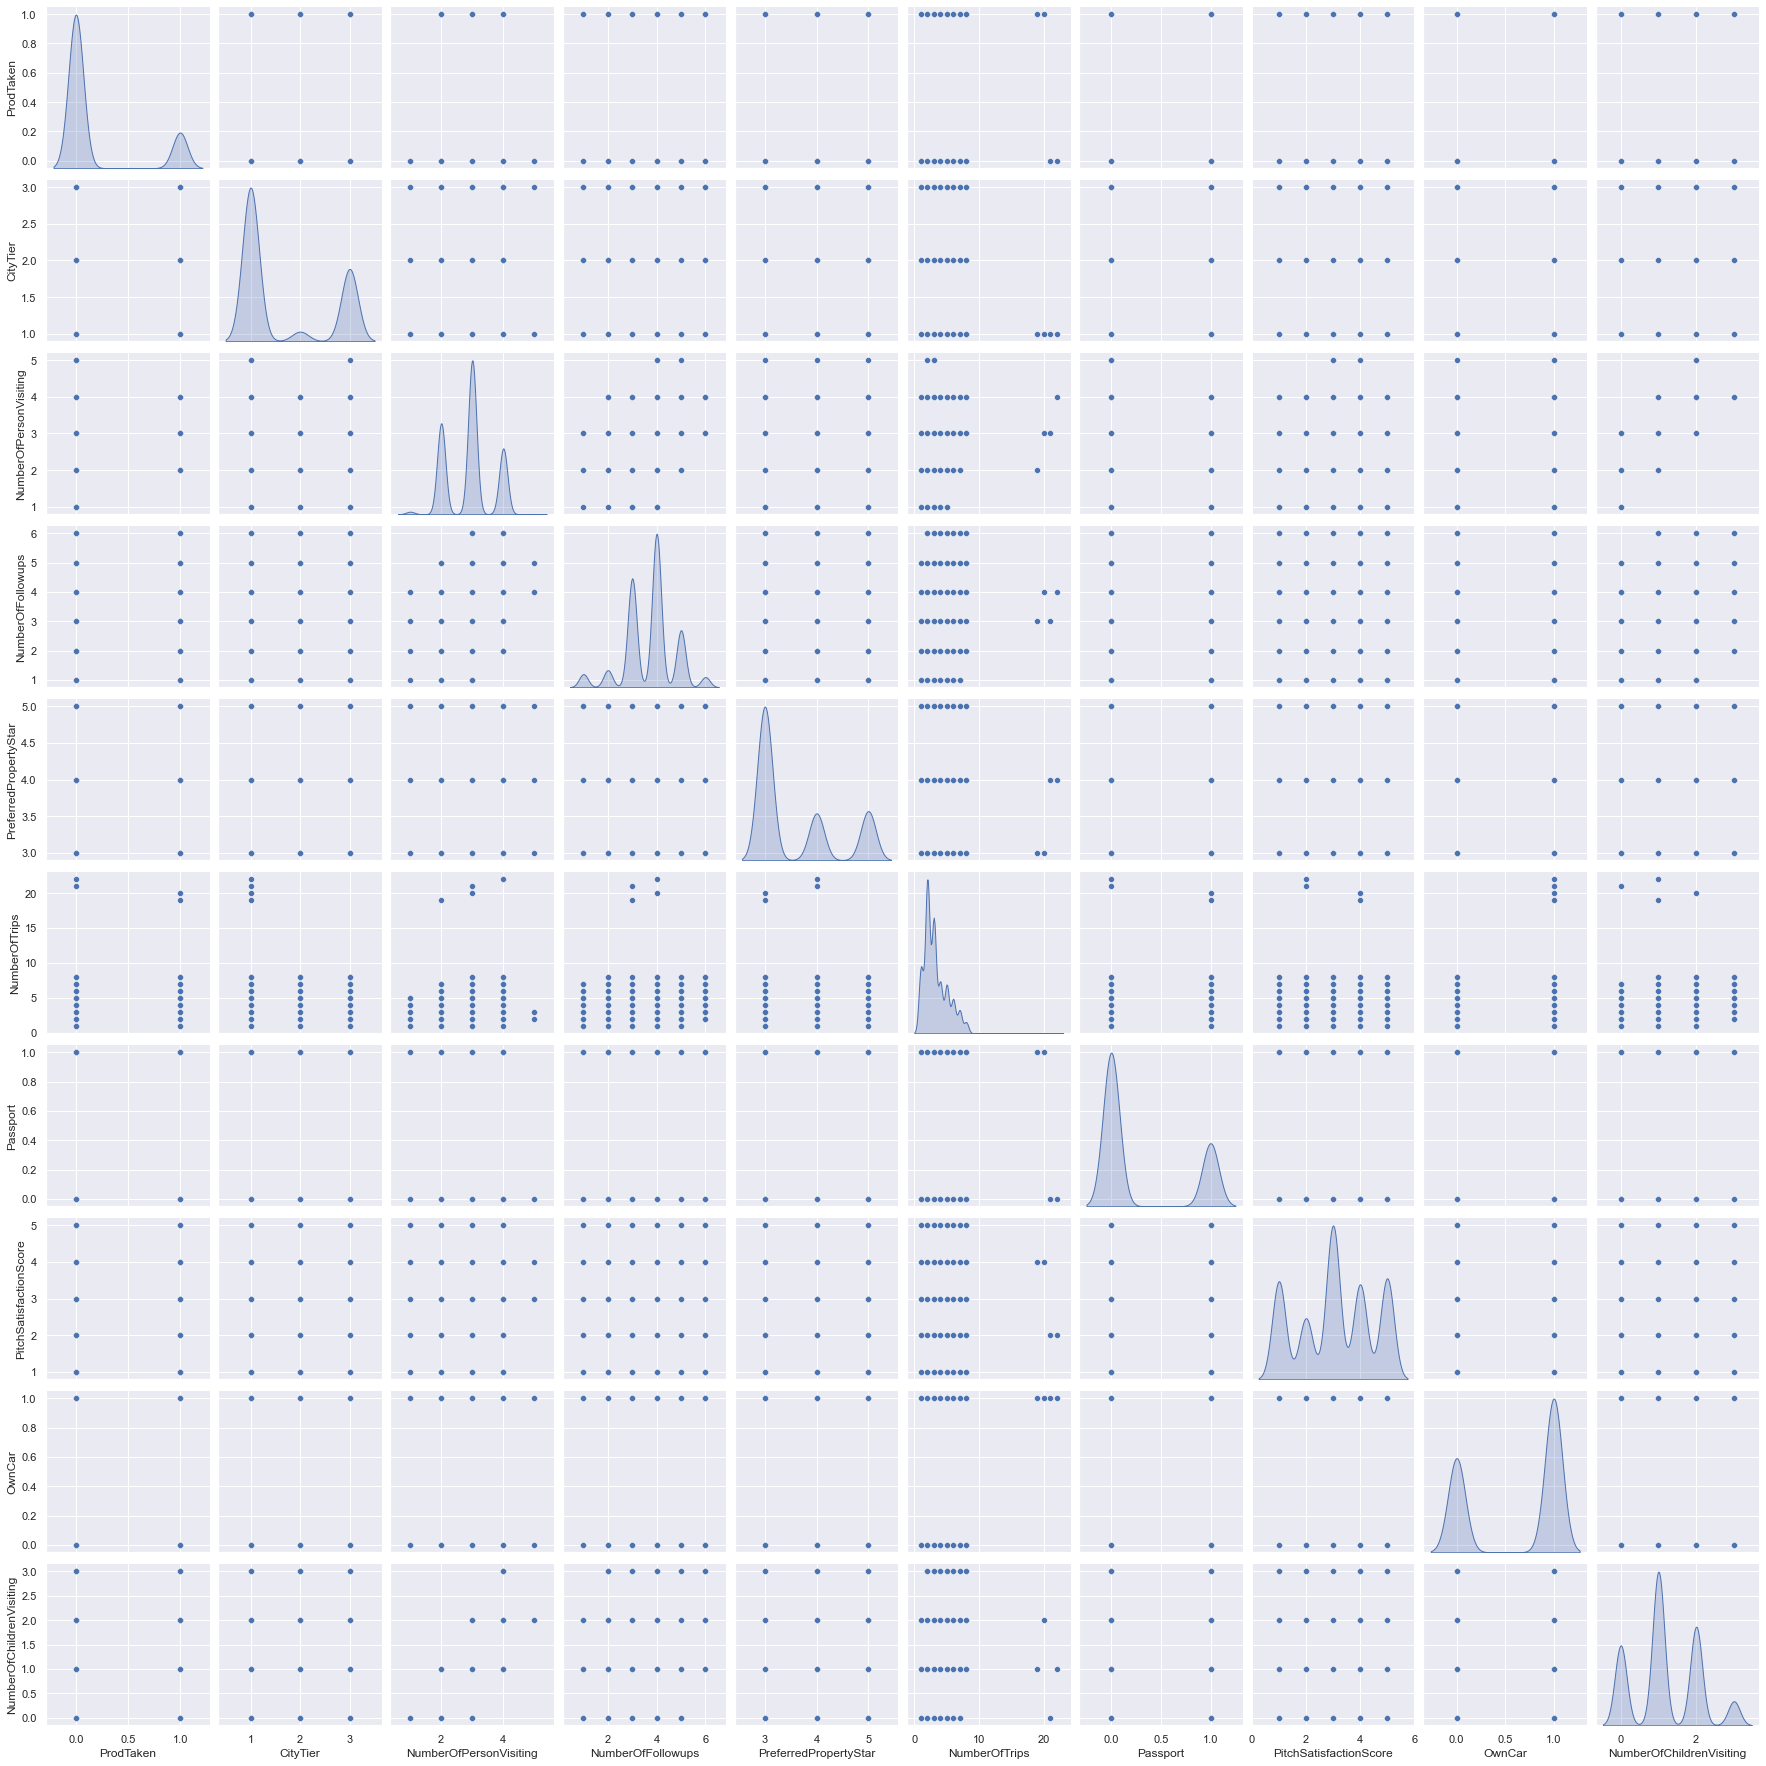

In [38]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=dataset[discrete_features], diag_kind='kde')

### 3.5.2 Continuous Numerical features

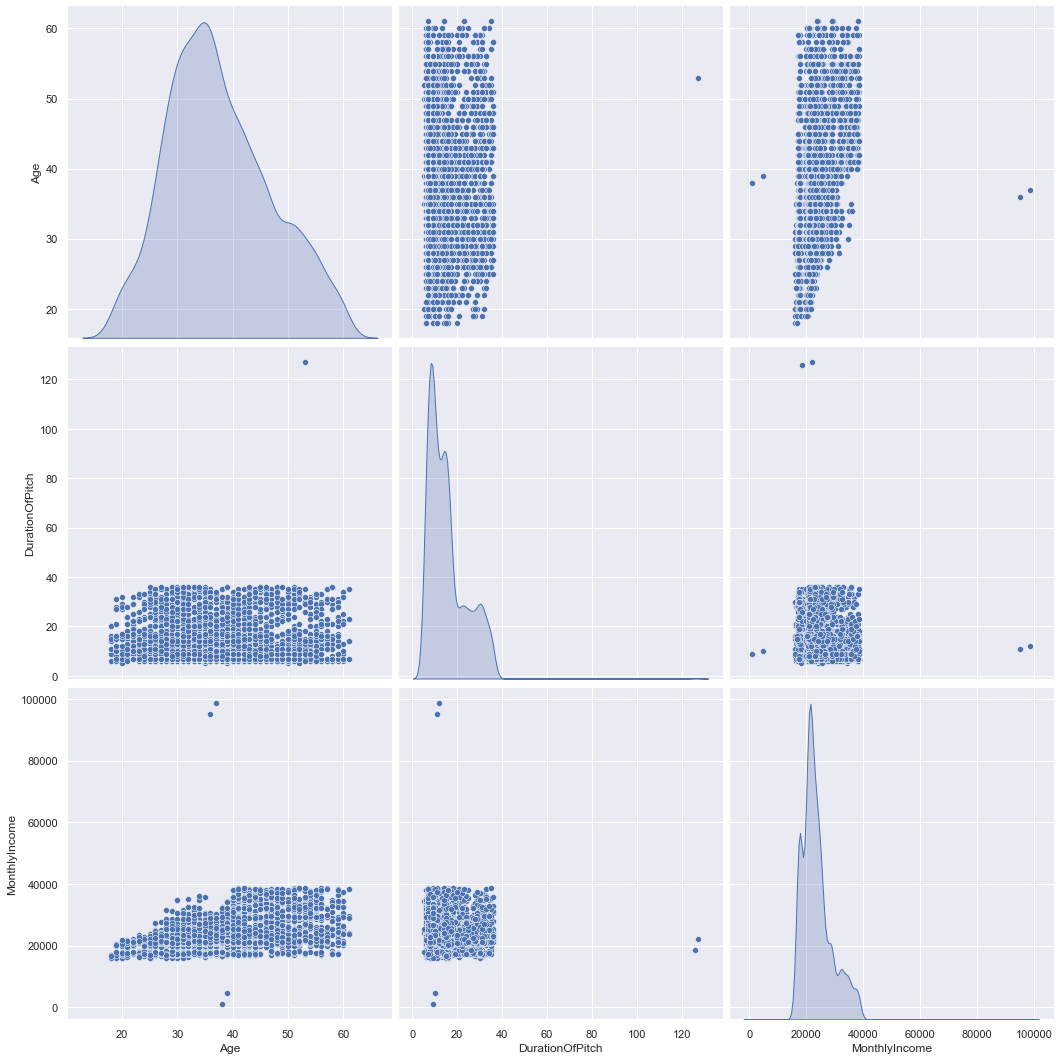

In [33]:
sns.set(rc={'figure.figsize':(10,10)})
sns.pairplot(data=dataset[continuous_features], diag_kind='kde', height=5)